## Read data from a Horizon vector table with a CSV format

- Data can be accessed at the following link: https://ssd.jpl.nasa.gov/horizons/app.html#/
- Set "Ephemeris type" to "Vector Table"
- In "Table settings", check "CSV format"


In [1]:
import re
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# file path
file_path = 'data_horizons/sat.txt'

In [30]:
def get_horizons_csv(file_path):
    with open(file_path, 'r') as file:
        data = file.read()  # Read the entire content of the file

    # Split the data into lines
    lines = data.strip().splitlines()

    # Prepare lists for positions and velocities
    positions = []
    velocities = []

    # Initialize variables to track whether we are in the data section
    in_data_section = False

    # Regular expression pattern to capture the required values
    pattern = re.compile(r'([\d.E+-]+),\s*A\.D\.\s*([\d-]+-[A-Za-z]{3}-[\d]+ [\d:]+\.\d+),\s*([\d.E+-]+),\s*([\d.E+-]+),\s*([\d.E+-]+),\s*([\d.E+-]+),\s*([\d.E+-]+),\s*([\d.E+-]+),\s*([\d.E+-]+),\s*([\d.E+-]+),\s*([\d.E+-]+),')

    for line in lines:
        # Check for the start of the data section
        if line.strip() == "$$SOE":
            in_data_section = True
            continue  # Skip the line containing $$SOE
        
        # Check for the end of the data section
        if line.strip() == "$$EOE":
            break  # Exit the loop if we reach $$EOE
        
        # Process lines if we are in the data section
        if in_data_section:
            match = pattern.search(line)
            if match:
                # Extract the values and append them to the lists
                x, y, z, vx, vy, vz = map(float, match.groups()[2:8])  # skip the first match group (JD)
                positions.append([x, y, z])
                velocities.append([vx, vy, vz])


    # Convert lists to NumPy arrays for easier manipulation
    positions = np.array(positions)
    velocities = np.array(velocities)

    return positions, velocities

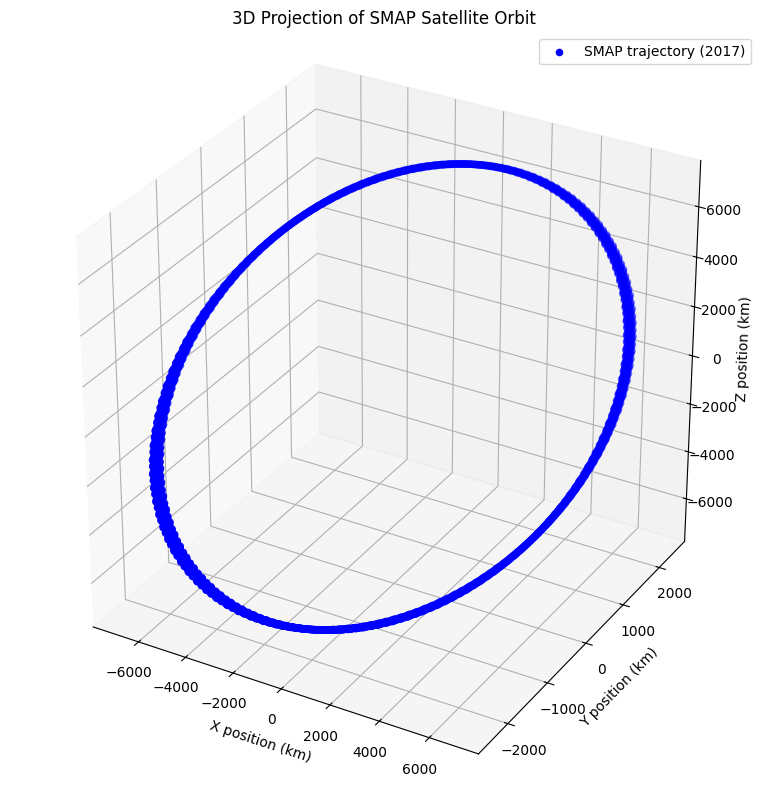

In [32]:
positions, _ = get_horizons_csv(file_path)

# Extract x, y, and z coordinates for 3D plotting
x_coords = positions[:, 0]
y_coords = positions[:, 1] 
z_coords = positions[:, 2] 

# Create a 3D plot of the satellite's trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, label='SMAP trajectory (2017)', color='blue')

ax.set_xlabel("X position (km)")
ax.set_ylabel("Y position (km)")
ax.set_zlabel("Z position (km)")
ax.set_title("3D Projection of SMAP Satellite Orbit")
ax.set_box_aspect([1, 1, 1])  # Optional: Set equal scaling for all axes
plt.tight_layout()
ax.grid(True)
ax.legend()
plt.show()
